### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

Ονοματεπώνυμο φοιτητή: Δαλαμπέκης Κωνσταντίνος

Α.Μ.: 03120055

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [3]:
import numpy as np

image=np.load('/content/indian_pines_corrected.npy')

1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [4]:
print(image.shape)

(145, 145, 200)


In [5]:
ground_truth=np.load('/content/indian_pines_gt.npy')

print(ground_truth.shape)

(145, 145)


### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

In [6]:
#2α

print("Το ύψος και το πλάτος και ο αριθμός των υπερφασματικών καναλιών είναι αντίστοιχα:",image.shape)



Το ύψος και το πλάτος και ο αριθμός των υπερφασματικών καναλιών είναι αντίστοιχα: (145, 145, 200)


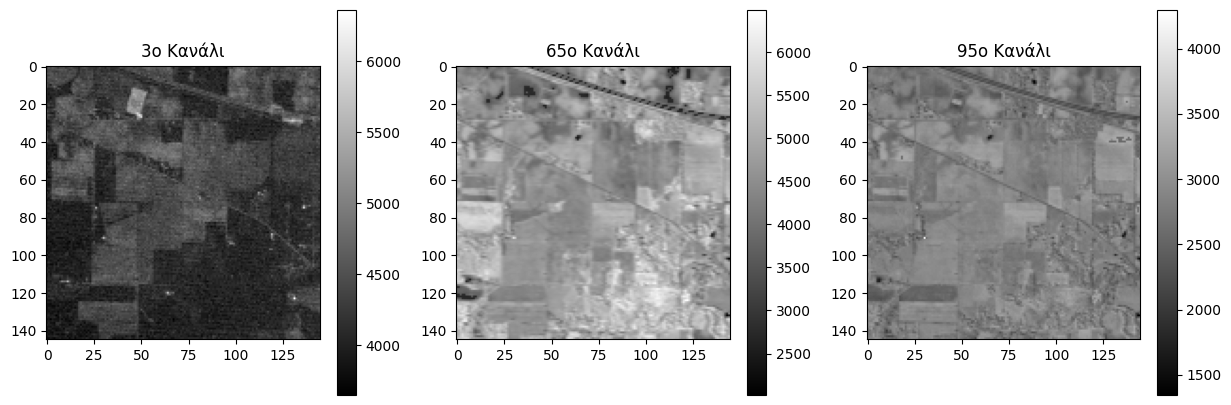

In [7]:
#2β

import matplotlib.pyplot as plt
import numpy as np


# Δημιουργία ενός subplot για κάθε ένα από τα επιλεγμένα κανάλια
plt.figure(figsize=(15, 5))

# Σχεδιάζουμε το 3ο κανάλι
plt.subplot(1, 3, 1)
plt.imshow(image[:, :, 2], cmap='gray')
plt.title('3ο Κανάλι')
plt.colorbar()

# Σχεδιάζουμε το 65ο κανάλι
plt.subplot(1, 3, 2)
plt.imshow(image[:, :, 64], cmap='gray')
plt.title('65ο Κανάλι')
plt.colorbar()

# Σχεδιάζουμε το 95ο κανάλι
plt.subplot(1, 3, 3)
plt.imshow(image[:, :, 94], cmap='gray')
plt.title('95ο Κανάλι')
plt.colorbar()

# Εμφάνιση των σχεδιασμάτων
plt.show()


In [8]:
#2γ
import numpy as np

# Υπολογισμός των μοναδικών τιμών
unique_classes = np.unique(ground_truth)

# Υπολογισμός του αριθμού των διαφορετικών κλάσεων
num_classes = len(unique_classes)

print("Αριθμός διαφορετικών κατηγοριών καλλιέργειας/κλάσης:", num_classes)



Αριθμός διαφορετικών κατηγοριών καλλιέργειας/κλάσης: 17


In [9]:
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

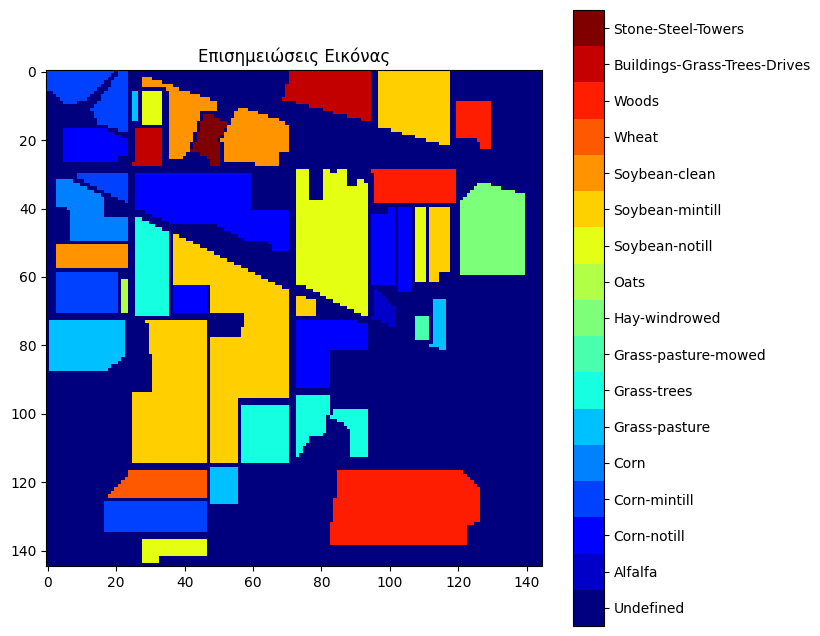

In [10]:
#2δ
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Δημιουργία ενός χάρτη χρωμάτων
num_classes = len(classes)
colors = plt.cm.jet(np.linspace(0, 1, num_classes))
cmap = ListedColormap(colors)

# Σχεδίαση της εικόνας με τις επισημειώσεις
plt.figure(figsize=(8, 8))
plt.imshow(ground_truth, cmap=cmap)
plt.clim(-0.5, num_classes - 0.5)

# Προσθήκη επεξηγηματικών ετικετών στη λεζάντα
cbar = plt.colorbar()
cbar.set_ticks(np.arange(num_classes))
cbar.set_ticklabels(classes)

plt.title('Επισημειώσεις Εικόνας')
plt.show()


In [11]:
np.unique(ground_truth, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       dtype=uint8),
 array([10776,    46,  1428,   830,   237,   483,   730,    28,   478,
           20,   972,  2455,   593,   205,  1265,   386,    93]))

In [12]:
import numpy as np

# Υπολογισμός των μοναδικών τιμών και του αριθμού των εμφανίσεων κάθε τιμής
unique, counts = np.unique(ground_truth, return_counts=True)

# Επιστρέφει τις μοναδικές τιμές καθώς και τον αριθμό των εμφανίσεων κάθε τιμής στον πίνακα.

# Δημιουργία λεξικού που θα συσχετίζει κάθε κλάση με τον αριθμό των pixels
class_counts = dict(zip(unique, counts))

# Εκτύπωση του αριθμού των pixels για κάθε κλάση
for class_id, count in class_counts.items():
    # Αγνοήστε την κλάση αν δεν είναι ορισμένη
    if class_id < len(classes) and class_id >= 0:
        print(f"Κλάση '{classes[class_id]}': {count} pixels")


Κλάση 'Undefined': 10776 pixels
Κλάση 'Alfalfa': 46 pixels
Κλάση 'Corn-notill': 1428 pixels
Κλάση 'Corn-mintill': 830 pixels
Κλάση 'Corn': 237 pixels
Κλάση 'Grass-pasture': 483 pixels
Κλάση 'Grass-trees': 730 pixels
Κλάση 'Grass-pasture-mowed': 28 pixels
Κλάση 'Hay-windrowed': 478 pixels
Κλάση 'Oats': 20 pixels
Κλάση 'Soybean-notill': 972 pixels
Κλάση 'Soybean-mintill': 2455 pixels
Κλάση 'Soybean-clean': 593 pixels
Κλάση 'Wheat': 205 pixels
Κλάση 'Woods': 1265 pixels
Κλάση 'Buildings-Grass-Trees-Drives': 386 pixels
Κλάση 'Stone-Steel-Towers': 93 pixels


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

In [13]:
import numpy as np



# Μετατροπή της εικόνας σε πίνακα N x K
N, _, K = image.shape
image_reshaped = image.reshape((N * N, K))

# Μετατροπή των επισημειώσεων σε διάνυσμα μήκους N
ground_truth_reshaped = ground_truth.ravel()

# Εύρεση των δεικτών που αντιστοιχούν στην κλάση 'Undefined'
undefined_indices = np.where(ground_truth_reshaped == 0)[0]

# Αφαίρεση των δεδομένων που είναι επισημειωμένα ως 'Undefined'
image_final = np.delete(image_reshaped, undefined_indices, axis=0)
ground_truth_final = np.delete(ground_truth_reshaped, undefined_indices)

# Εκτύπωση των νέων διαστάσεων για επιβεβαίωση
print("Νέες διαστάσεις της εικόνας:", image_final.shape)
print("Νέο μήκος των επισημειώσεων:", ground_truth_final.shape)


Νέες διαστάσεις της εικόνας: (10249, 200)
Νέο μήκος των επισημειώσεων: (10249,)


3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

In [17]:
import numpy as np


# Select a random pixel from each category
random_pixels = {class_name: image_final[np.random.choice(np.where(ground_truth_final == class_id)[0])]
                 for class_id, class_name in enumerate(classes) if np.any(ground_truth_final == class_id)}

# Print the selected pixels
for class_name, pixel in random_pixels.items():
    print(f"Κλάση {class_name}: Pixel = {pixel}", pixel.shape)



Κλάση Alfalfa: Pixel = [3019 4115 4123 4036 4464 4748 4797 4612 4670 4419 4382 4443 4332 4519
 4512 4507 4442 4274 4153 4031 4012 3975 3912 3792 3744 3614 2688 2701
 2666 3304 3774 3280 3771 4472 4693 4783 5466 5988 5970 4180 6120 6216
 6046 6044 5580 5142 5485 5920 5958 5951 5932 5956 5869 4807 4607 4536
 4065 2427 2629 2910 3763 4453 4999 5351 5229 5241 5174 5136 5104 5057
 4909 4827 4746 4552 3973 3238 1883 1689 1989 1920 2489 3181 2560 3285
 2624 2566 2683 2774 3659 3643 2753 3097 3229 2600 3144 2577 2582 3136
 2772 2524 2013 1637 1106 1049 1060 1085 1109 1220 1308 1240 1337 1566
 1776 1933 2053 2106 2146 2150 2122 2034 2042 2080 2041 2041 2107 2105
 2051 2026 2018 1976 1948 1902 1859 1806 1762 1696 1657 1619 1576 1483
 1364 1256 1127 1032 1025 1029 1075 1152 1223 1185 1081 1067 1161 1255
 1236 1177 1166 1208 1245 1259 1260 1253 1257 1266 1263 1235 1236 1231
 1231 1229 1217 1232 1234 1222 1200 1188 1176 1170 1162 1141 1140 1136
 1130 1127 1117 1104 1107 1088 1086 1087 1075 1064 106

3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

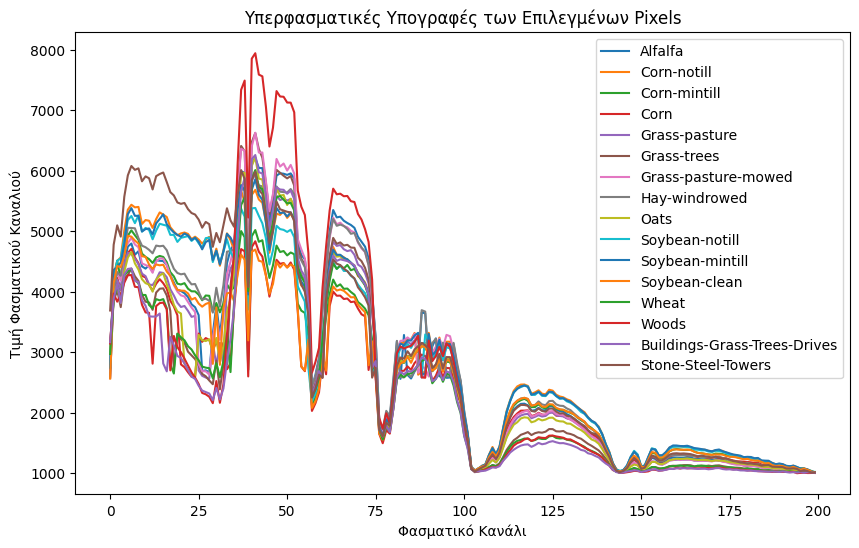

In [18]:
import matplotlib.pyplot as plt

# Σχεδίαση των υπερφασματικών υπογραφών
plt.figure(figsize=(10, 6))
for class_name, pixel in random_pixels.items():
    plt.plot(pixel, label=class_name)

plt.title('Υπερφασματικές Υπογραφές των Επιλεγμένων Pixels')
plt.xlabel('Φασματικό Κανάλι')
plt.ylabel('Τιμή Φασματικού Καναλιού')
plt.legend()
plt.show()


3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

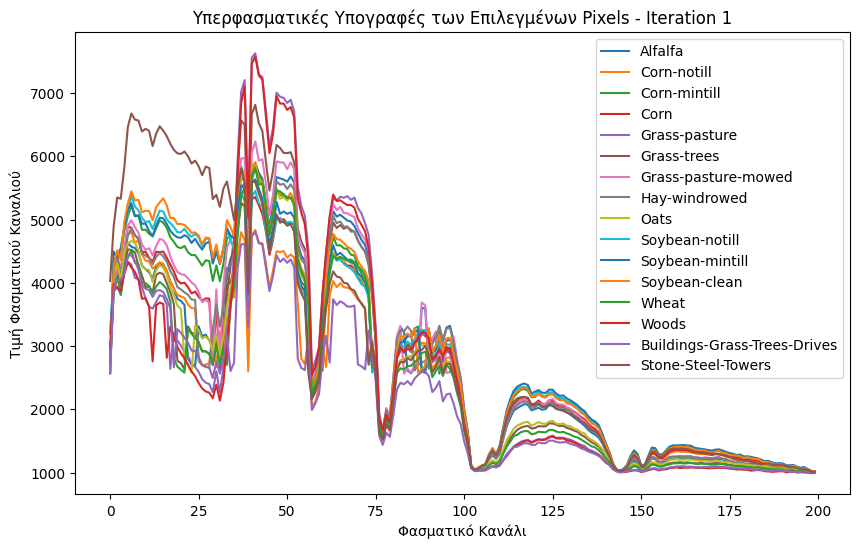

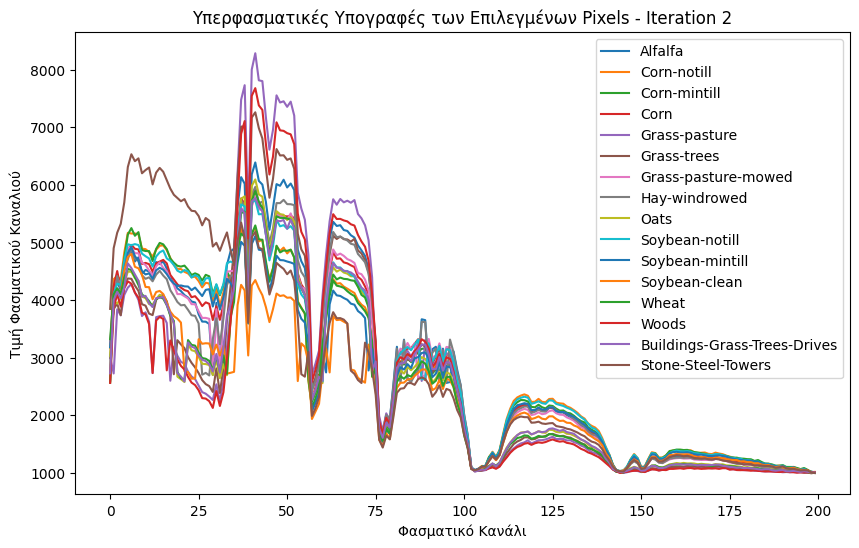

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def select_random_pixels(classes, ground_truth, image):
    return {class_name: image[np.random.choice(np.where(ground_truth == class_id)[0])]
            for class_id, class_name in enumerate(classes) if np.any(ground_truth == class_id)}

def plot_signatures(pixels, title):
    plt.figure(figsize=(10, 6))
    for class_name, pixel in pixels.items():
        plt.plot(pixel, label=class_name)
    plt.title(title)
    plt.xlabel('Φασματικό Κανάλι')
    plt.ylabel('Τιμή Φασματικού Καναλιού')
    plt.legend()
    plt.show()

# Repeat the process two more times
for i in range(2):
    random_pixels = select_random_pixels(classes, ground_truth_final, image_final)
    plot_signatures(random_pixels, f'Υπερφασματικές Υπογραφές των Επιλεγμένων Pixels - Iteration {i+1}')


3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

Υπάρχουν μερικά κανάλια όπου οι καμπύλες των διάφορων κατηγοριών συγκλίνουν, κάτι που σημαίνει ότι αυτά τα κανάλια δεν είναι τόσο χρήσιμα για τη διάκριση μεταξύ των κατηγοριών.
Αντίθετα, υπάρχουν κανάλια όπου οι καμπύλες διαφοροποιούνται σημαντικά, πράγμα που δείχνει ότι αυτά τα κανάλια παρέχουν πιο διακριτική πληροφορία που μπορεί να βοηθήσει στο διαχωρισμό των κατηγοριών.

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

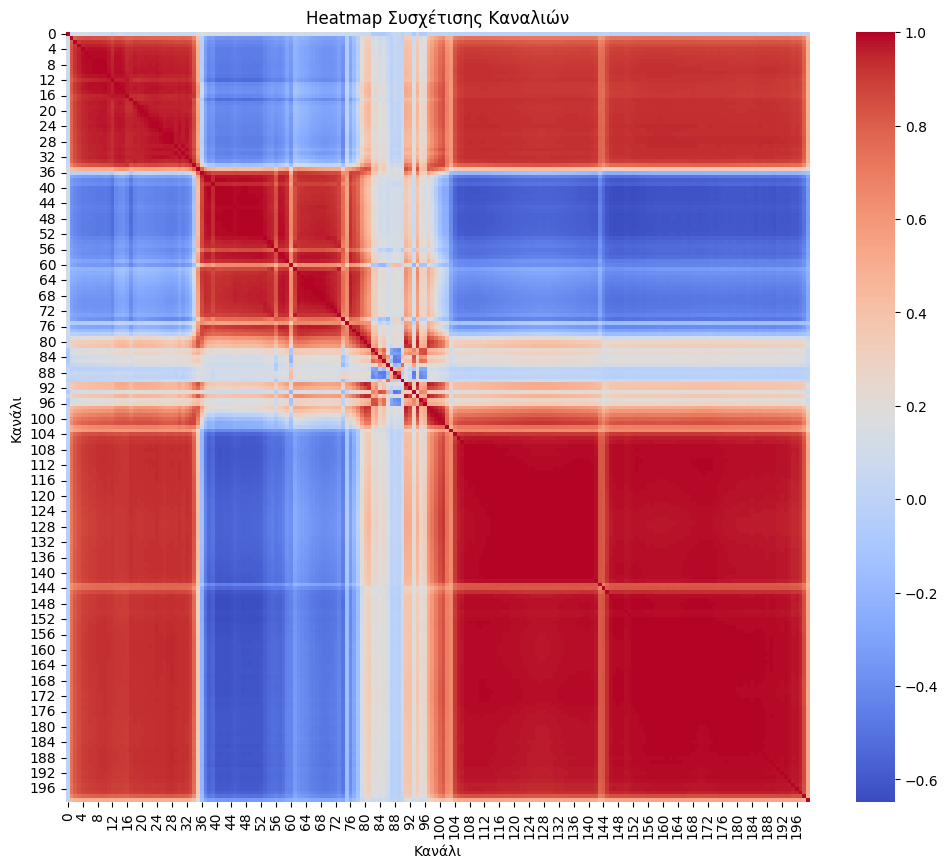

In [ ]:
# Υποθέτουμε ότι το 'image_final' είναι ο δισδιάστατος πίνακας N x K της εικόνας
correlation_matrix = np.corrcoef(image_final.T)    # Χρησιμοποιούμε τον μετασχηματισμό (T) διότι είναι απαραίτητο για να υπολογίσουμε τη συσχέτιση μεταξύ των φασματικών καναλιών, που είναι ο στόχος στην ανάλυση υπερφασματικών δεδομένων.
import seaborn as sns
import matplotlib.pyplot as plt

# Σχεδιάζουμε το heatmap χρησιμοποιώντας την Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Heatmap Συσχέτισης Καναλιών')
plt.xlabel('Κανάλι')
plt.ylabel('Κανάλι')
plt.show()


Από το heatmap που προέκυψε μπορούμε να παρατηρήσουμε τα εξής:
- Οι περιοχές με έντονο κόκκινο χρώμα δείχνουν υψηλό επίπεδο θετικής συσχέτισης, που σημαίνει ότι τα αντίστοιχα κανάλια έχουν παρόμοιες μετρήσεις αντανακλαστικότητας. Αυτό συνήθως υποδηλώνει ότι οι κατηγορίες που απεικονίζονται σε αυτά τα κανάλια έχουν παρόμοιες φασματικές ιδιότητες.
- Οι περιοχές με μπλε χρώμα αντιπροσωπεύουν χαμηλή ή αρνητική συσχέτιση. Αυτό σημαίνει ότι οι μετρήσεις αντανακλαστικότητας από τα κανάλια αυτά διαφέρουν σημαντικά, προσφέροντας διαφορετική πληροφορία για την ανάλυση και μπορεί να βοηθήσουν στον εντοπισμό των διαφορών μεταξύ των κατηγοριών.
- Κανάλια με σημαντικά αυξομειούμενα επίπεδα συσχέτισης μπορεί να είναι καίρια για την ανάλυση και ταξινόμηση των υλικών. Αυτά τα κανάλια μπορεί να περιλαμβάνουν περιοχές όπου υπάρχουν ορατές αντανακλαστικές πικ νότες ή περιοχές απορρόφησης, που είναι χρήσιμες για την ανίχνευση ειδικών χαρακτηριστικών των υλικών.
- Η μεταβλητότητα στη συσχέτιση μπορεί επίσης να δείχνει την ευαισθησία των καναλιών σε διαφορετικές συνθήκες φωτισμού, καταστάσεις της επιφάνειας της γης ή εποχικές αλλαγές στη βλάστηση.
Θα κάνουμε μερική απλοποίηση των δεδομένων μας για να έχουμε καλύτερα αποτελέσματα


### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

In [21]:
from munkres import Munkres
import numpy as np

def translate_labels(pred_labels, true_labels):
    unique_labels = np.unique(true_labels)
    cost_matrix = np.array([[-np.sum((pred_labels == pred) & (true_labels == true))
                             for true in unique_labels] for pred in unique_labels])

    munkres = Munkres()
    indexes = munkres.compute(cost_matrix)
    translation_map = {pred: true for pred, true in indexes}

    translated_labels = np.vectorize(translation_map.get)(pred_labels)
    return translated_labels

# Usage example
# translated_labels = translate_labels(predicted_y, ground_truth_y)


 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, silhouette_score

def compute_metrics(image_data, true_labels, n_clusters=16, rand_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=rand_state).fit(image_data)
    cluster_labels = kmeans.predict(image_data)
    translated_labels = translate_labels(cluster_labels, true_labels - 1)

    acc_score = np.trace(confusion_matrix(true_labels, translated_labels + 1)) / len(true_labels)
    rand_score = adjusted_rand_score(true_labels, cluster_labels)
    sil_score = silhouette_score(image_data, cluster_labels)

    return acc_score, rand_score, sil_score

accuracy, rand_score, silhouette = compute_metrics(image_final, ground_truth_final)
print("Accuracy:", accuracy)
print("Rand Score:", rand_score)
print(f"Silhouette Score: {silhouette}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.3554493121280125
Rand Score: 0.205184479919157
Silhouette Score: 0.2821754627335447


4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

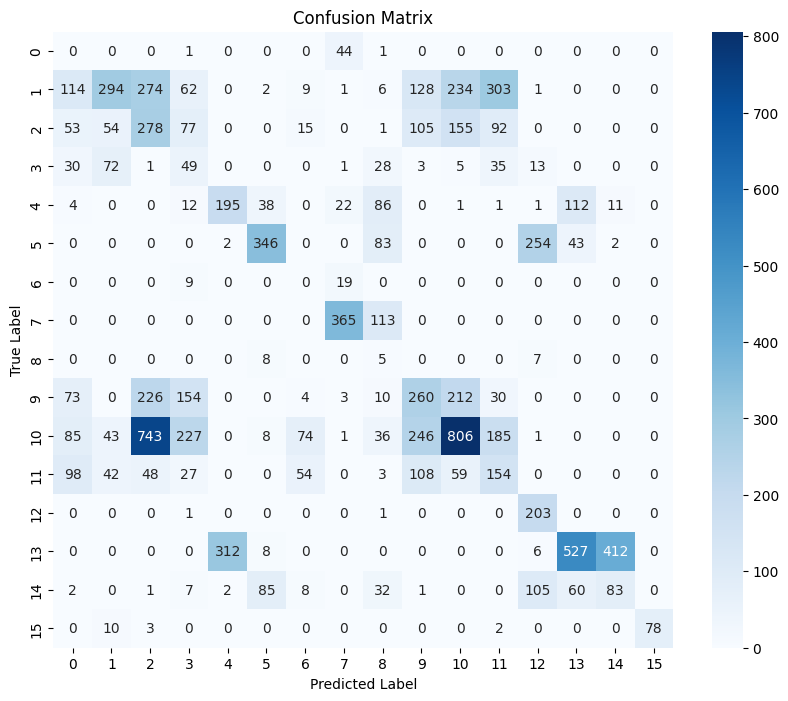

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Υποθέτουμε ότι το 'ground_truth_final' είναι το διάνυσμα των πραγματικών ετικετών
# και το 'translated_predicted_y' είναι το διάνυσμα των αντιστοιχισμένων predicted labels

# Υπολογισμός του confusion matrix
cm = confusion_matrix(ground_truth_final, translated_predicted_labels+1)

# Σχεδίαση του confusion matrix ως heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

In [25]:
label_iter = iter(translated_predicted_labels+1)
ground_truth_new=ground_truth
# Replace non-zero elements in the table
for i in range(ground_truth.shape[0]):
    for j in range(ground_truth.shape[1]):
        if ground_truth[i, j] != 0:  # If the table element is non-zero
            ground_truth_new[i, j] = next(label_iter)

# Display a small part of the table to verify
ground_truth.shape

(145, 145)

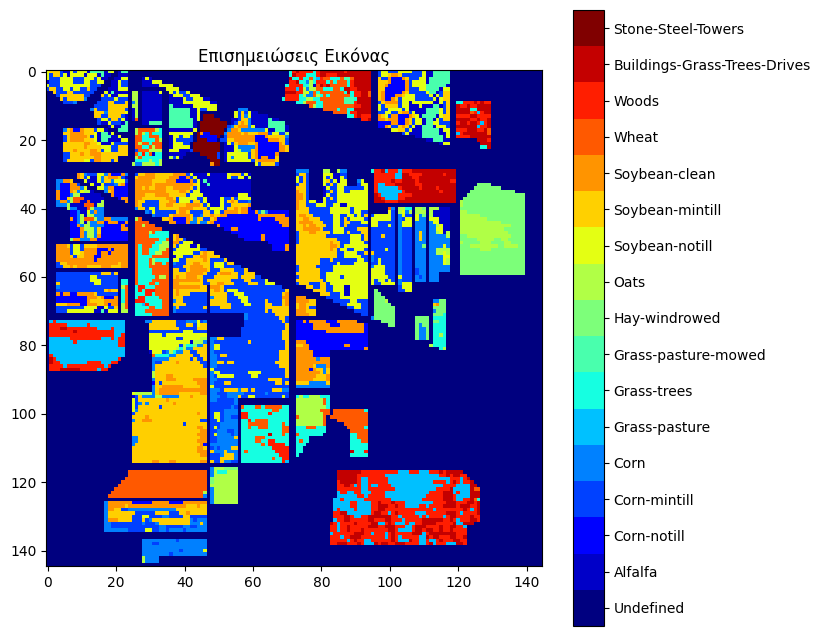

In [26]:
#2δ
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Δημιουργία ενός χάρτη χρωμάτων
num_classes = len(classes)
colors = plt.cm.jet(np.linspace(0, 1, num_classes))
cmap = ListedColormap(colors)

# Σχεδίαση της εικόνας με τις επισημειώσεις
plt.figure(figsize=(8, 8))
plt.imshow(ground_truth_new, cmap=cmap)
plt.clim(-0.5, num_classes - 0.5)

# Προσθήκη επεξηγηματικών ετικετών στη λεζάντα
cbar = plt.colorbar()
cbar.set_ticks(np.arange(num_classes))
cbar.set_ticklabels(classes)

plt.title('Επισημειώσεις Εικόνας')
plt.show()


### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(image_final)
image_pca = pca.transform(image_final)


5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [28]:
from sklearn.decomposition import PCA

# The explained variance ratio of each component
explained_variance_ratio = pca.explained_variance_ratio_

# The total variance preserved by the first three components
total_variance_preserved = explained_variance_ratio.sum() * 100  # Convert to percentage

print(f'The first three principal components preserve {total_variance_preserved:.2f}% of the total variance.')


The first three principal components preserve 94.20% of the total variance.


### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA

# Define a custom accuracy function
def calculate_accuracy(cm):
    return np.trace(cm) / np.sum(cm)


# Apply k-means on PCA-reduced data
k = 16
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(image_pca)
cluster_labels_pca = kmeans.predict(image_pca)

# Translate labels and calculate metrics
translated_predicted_labels_pca = translate_predicted_labels(cluster_labels_pca, ground_truth_final-1)
accuracy_score_pca = calculate_accuracy(confusion_matrix(ground_truth_final, translated_predicted_labels_pca+1))
rand_score_pca = adjusted_rand_score(ground_truth_final, cluster_labels_pca)
silhouette_score_pca = silhouette_score(image_pca, cluster_labels_pca)

print("Accuracy:", accuracy_score_pca)
print("Rand Score:", rand_score_pca)
print(f"Silhouette Score: {silhouette_score_pca}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.3450092691969948
Rand Score: 0.20159043693986198
Silhouette Score: 0.3746252169853458


6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

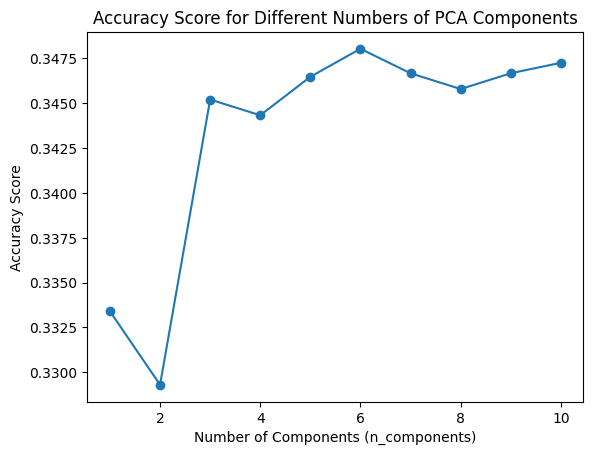

In [33]:
import matplotlib.pyplot as plt


scores = []  # Λίστα για την αποθήκευση των scores
n_components_range = range(1, 11)  # Διαφορετικές τιμές για το n_components

for n_components in n_components_range:
    # Εφαρμόζουμε PCA
    pca = PCA(n_components=n_components)
    image_pca = pca.fit_transform(image_final)

    # Εκτελούμε k-Means
    kmeans = KMeans(n_clusters=16)
    kmeans.fit(image_pca)

    cluster_labels_pcas= kmeans.predict(image_pca)

    translated_predicted_labels=translate_predicted_labels(cluster_labels_pcas, ground_truth_final-1)
    # Υπολογίζουμε το silhouette score
    score = calculate_accuracy(confusion_matrix(ground_truth_final, translated_predicted_labels+1))
    scores.append(score)

# Δημιουργούμε ένα διάγραμμα με το n_components στον άξονα των X και το silhouette score στον άξονα των Y
plt.plot(n_components_range, scores, marker='o')
plt.xlabel('Number of Components (n_components)')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Numbers of PCA Components')
plt.show()
